<a href="https://colab.research.google.com/github/Abhishek9895analyst/AB-s-Repo/blob/main/Jenics_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#importing the various libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#converting the data to dataframe
path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/Hotel Booking Analysis/'
file = 'Hotel Bookings.csv'
hotel_df = pd.read_csv(path + file)

In [ ]:
#head
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#tail
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
hotel_df.shape

(119390, 32)

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
tot_num = len(hotel_df.index)
tot_num

119390

# **Data Cleaning**
Looking for and handling Null Values

In [ ]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

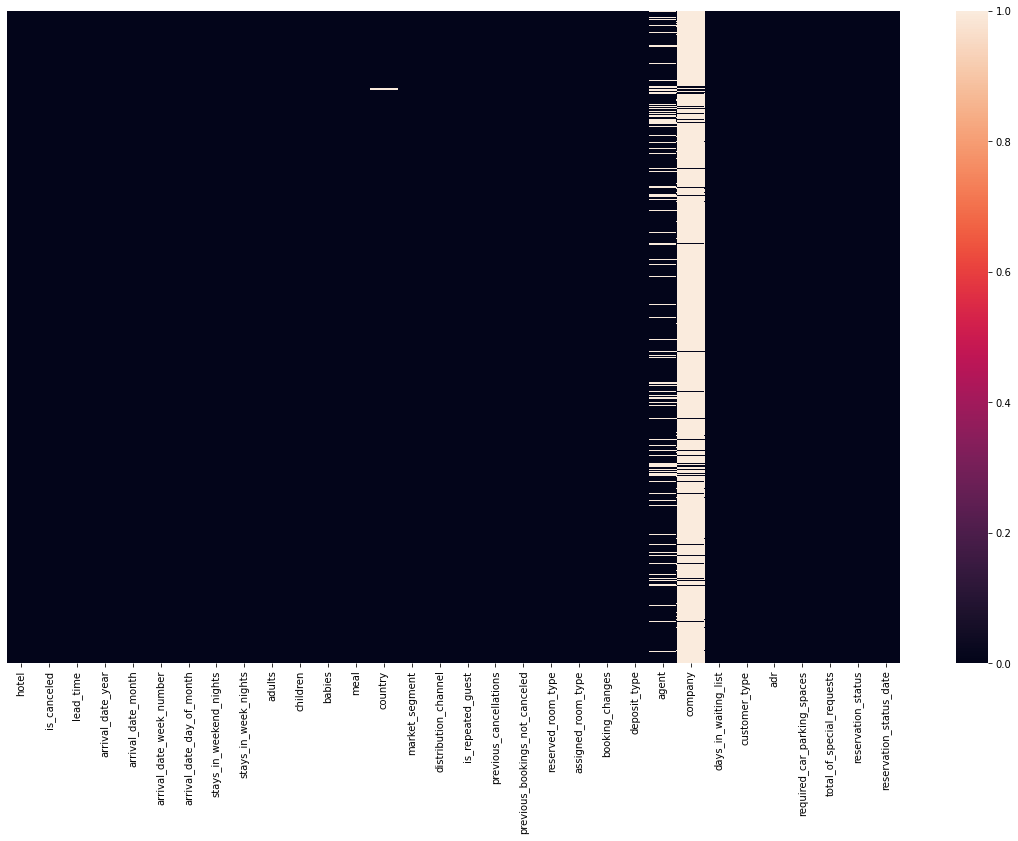

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(hotel_df.isnull(), cbar=True, yticklabels=False)

In [ ]:
hotel_df[['agent', 'company']] =hotel_df[['agent', 'company']].fillna(0.0)
hotel_df['country'].fillna(hotel_df.country.mode().to_string(), inplace=True)
hotel_df['children'].fillna(round(hotel_df.children.mean()), inplace=True)
hotel_df[['children', 'company', 'agent']] = hotel_df[['children', 'company', 'agent']].astype('int64')

In [ ]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

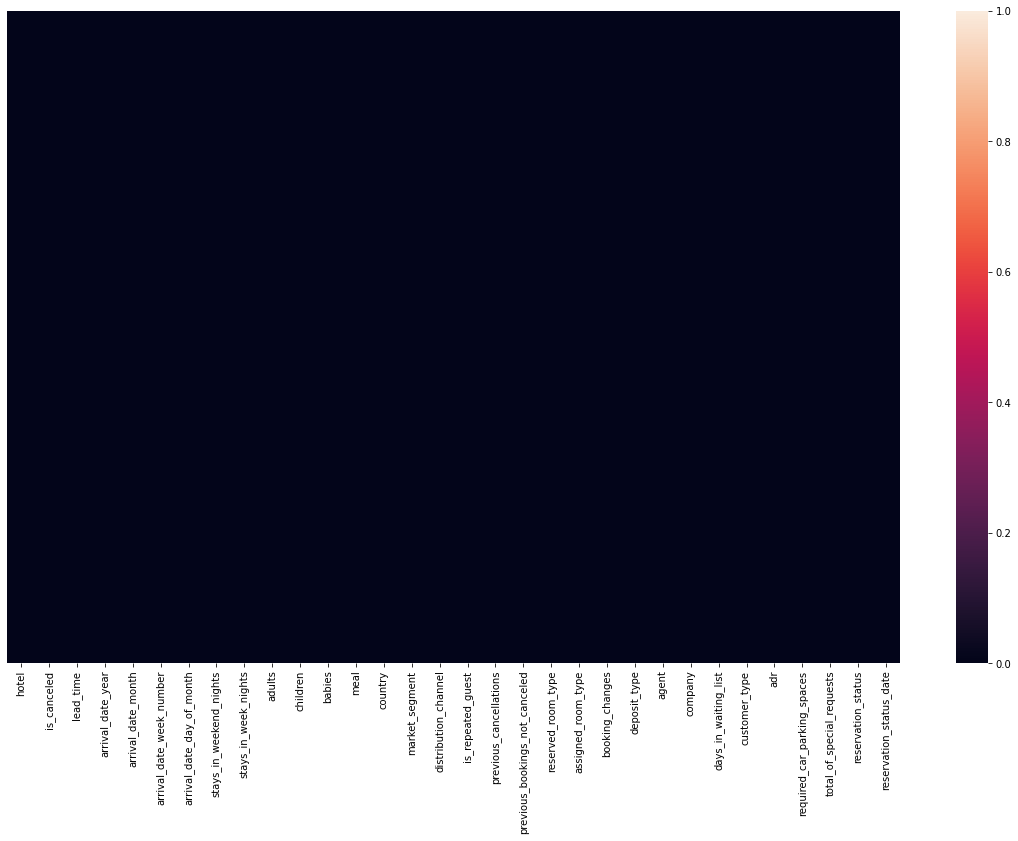

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(hotel_df.isnull(), cbar=True, yticklabels=False, vmin=0, vmax=1)

In [ ]:
city1_df = hotel_df[hotel_df['hotel']== 'City Hotel']
resort1_df = hotel_df[hotel_df['hotel']== 'Resort Hotel']
resort1_num = len(resort1_df.index)
city1_num = len(city1_df.index)

# **What is the percentage of special request by various types of customers in each type of hotel?**

In [ ]:
hotel1_df = hotel_df[['hotel' , 'customer_type','adults','children','babies','total_of_special_requests']]
hotel1_df['people'] = hotel1_df['adults'] + hotel1_df['children'] + hotel1_df['babies']
hotel1_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hotel,customer_type,adults,children,babies,total_of_special_requests,people
0,Resort Hotel,Transient,2,0,0,0,2
1,Resort Hotel,Transient,2,0,0,0,2
2,Resort Hotel,Transient,1,0,0,0,1
3,Resort Hotel,Transient,1,0,0,0,1
4,Resort Hotel,Transient,2,0,0,1,2
5,Resort Hotel,Transient,2,0,0,1,2
6,Resort Hotel,Transient,2,0,0,0,2
7,Resort Hotel,Transient,2,0,0,1,2
8,Resort Hotel,Transient,2,0,0,1,2
9,Resort Hotel,Transient,2,0,0,0,2


In [ ]:
customer_df = hotel1_df.groupby(['hotel' , 'customer_type']).agg({'total_of_special_requests':"sum", 'people':"sum"}).reset_index()
customer_df['percentage'] = (100*customer_df['total_of_special_requests'] / customer_df['people']).astype('int64')
customer_df

,hotel,customer_type,total_of_special_requests,people,percentage
0,City Hotel,Contract,2086,4582,45
1,City Hotel,Group,201,535,37
2,City Hotel,Transient,35769,119209,30
3,City Hotel,Transient-Party,5331,30152,17
4,Resort Hotel,Contract,885,3541,24
5,Resort Hotel,Group,171,862,19
6,Resort Hotel,Transient,20829,61982,33
7,Resort Hotel,Transient-Party,2943,14125,20


In [ ]:
city_df = customer_df[customer_df['hotel']== 'City Hotel']
city_list = list(city_df['percentage'])
city_list

[45, 37, 30, 17]

In [ ]:
resort_df = customer_df[customer_df['hotel']== 'Resort Hotel']
resort_list = list(resort_df['percentage'])
resort_list

[24, 19, 33, 20]

In [ ]:
customer_list = list(customer_df['customer_type'].unique())
customer_list

['Contract', 'Group', 'Transient', 'Transient-Party']

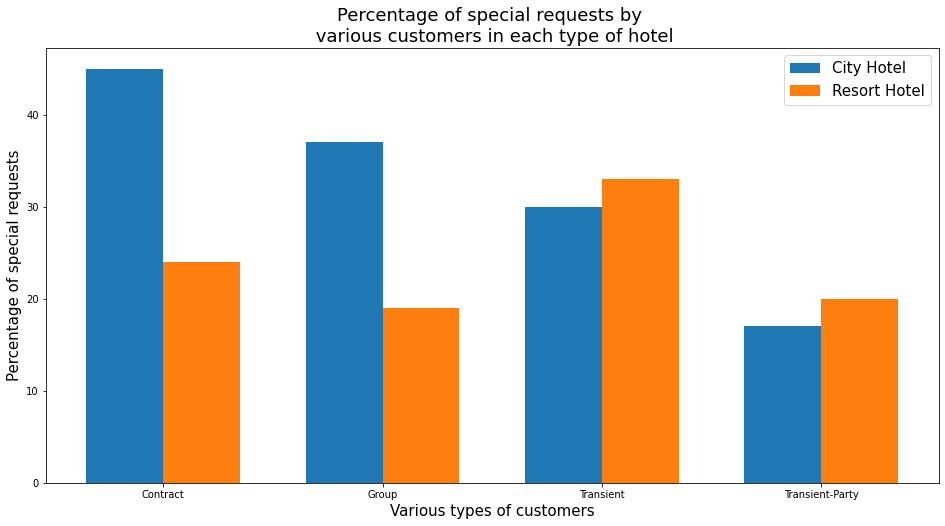

In [ ]:
#plotting in bar chart
x = np.arange(len(customer_list)) 
width = 0.35 
fig, ax = plt.subplots(figsize=(16,8))
rects1 = ax.bar(x - width/2, city_list, width, label='City Hotel')
rects2 = ax.bar(x + width/2, resort_list, width, label='Resort Hotel')

ax.set_ylabel('Percentage of special requests', fontsize=15)
ax.set_xlabel('Various types of customers', fontsize=15)
ax.set_title('Percentage of special requests by \n various customers in each type of hotel', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(customer_list)
ax.legend(prop={'size': 15})
plt.show()

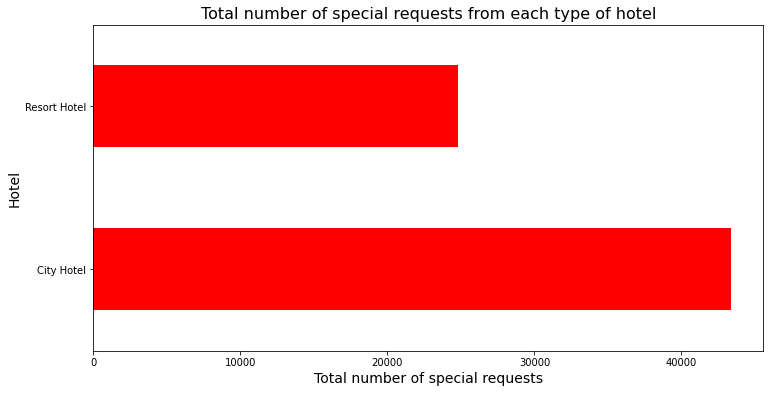

In [ ]:
sum_df_22 = hotel1_df.groupby(['hotel']).agg({'total_of_special_requests':"sum"})
ax = sum_df_22.plot.barh(color='red')
ax.set_xlabel('Total number of special requests', fontsize=14)
ax.set_ylabel('Hotel', fontsize=14)
ax.set_title('Total number of special requests from each type of hotel',fontsize=16)
ax.get_legend().remove()

In [ ]:
sum_df_22


,total_of_special_requests
hotel,
City Hotel,43387
Resort Hotel,24828


# **What is the percentage of reserved rooms that are assigned and not assigned for the customers?**

In [ ]:
city1_satisfied_df = city1_df[city1_df['reserved_room_type']== city1_df['assigned_room_type']]
city1_satisfied = len(city1_satisfied_df.index)
city1_satisfied_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,0,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,76.5,0,1,Canceled,2015-04-02


In [ ]:
city1_unsatisfied_df = city1_df[city1_df['reserved_room_type']!= city1_df['assigned_room_type']]
city1_unsatisfied = len(city1_unsatisfied_df.index)
city1_unsatisfied_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40194,City Hotel,1,0,2015,July,29,15,0,1,2,0,0,SC,PRT,Direct,Direct,0,0,0,A,F,0,No Deposit,0,0,0,Transient,0.0,0,0,Canceled,2015-07-15
40199,City Hotel,0,0,2015,July,29,15,2,5,2,0,0,SC,PRT,Direct,Direct,0,0,0,F,A,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-22
40297,City Hotel,0,20,2015,July,30,22,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,D,0,No Deposit,1,0,0,Transient-Party,62.0,0,0,Check-Out,2015-07-24
40310,City Hotel,0,20,2015,July,30,22,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,D,0,No Deposit,1,0,0,Transient-Party,62.0,0,0,Check-Out,2015-07-24
40313,City Hotel,0,20,2015,July,30,22,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,D,0,No Deposit,1,0,0,Transient-Party,62.0,0,0,Check-Out,2015-07-24


In [ ]:
city1_satisfied_per = 100*city1_satisfied / city1_num
city1_satisfied_per

90.93407286020421

In [ ]:
city1_unsatisfied_per = 100*city1_unsatisfied / city1_num
city1_unsatisfied_per

9.06592713979579

In [ ]:
resort1_satisfied_df = resort1_df[resort1_df['reserved_room_type']== resort1_df['assigned_room_type']]
resort1_satisfied = len(resort1_satisfied_df.index)
resort1_satisfied_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
resort1_unsatisfied_df = resort1_df[resort1_df['reserved_room_type']!= resort1_df['assigned_room_type']]
resort1_unsatisfied = len(resort1_unsatisfied_df.index)
resort1_unsatisfied_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240,0,0,Transient,97.00,0,3,Check-Out,2015-07-05
15,Resort Hotel,0,68,2015,July,27,1,0,4,2,0,0,BB,IRL,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240,0,0,Transient,97.00,0,3,Check-Out,2015-07-05
17,Resort Hotel,0,12,2015,July,27,1,0,1,2,0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,E,0,No Deposit,240,0,0,Transient,88.20,0,0,Check-Out,2015-07-02
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,0,110,0,Transient,107.42,0,0,Check-Out,2015-07-02


In [ ]:
resort1_satisfied_per = 100*resort1_satisfied / resort1_num
resort1_satisfied_per

80.71642536195706

In [ ]:
resort1_unsatisfied_per = 100*resort1_unsatisfied / resort1_num
resort1_unsatisfied_per

19.283574638042936

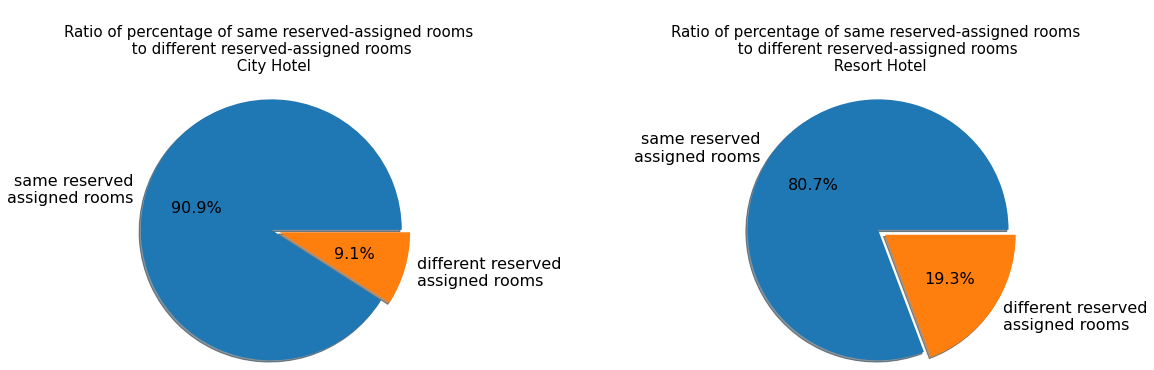

In [ ]:
city1_reserved_assign = np.array([city1_satisfied_per, city1_unsatisfied_per])
resort1_reserved_assign = np.array([resort1_satisfied_per, resort1_unsatisfied_per])
label1 = ['same reserved\nassigned rooms',  'different reserved\nassigned rooms']
plt.subplot(1, 2, 1)
plt.pie(city1_reserved_assign,labels=label1,autopct='%1.1f%%', explode=(0,0.1),radius=1.5,shadow=True, textprops={'fontsize': 16})
plt.title('\nRatio of percentage of same reserved-assigned rooms \n to different reserved-assigned rooms \n City Hotel', fontsize= 15, pad=50)

plt.subplot(1, 2, 2)
plt.pie(resort1_reserved_assign,labels=label1,autopct='%1.1f%%', explode=(0,0.1),radius=1.5,shadow=True, textprops={'fontsize': 16})
plt.title('\nRatio of percentage of same reserved-assigned rooms \n to different reserved-assigned rooms \n Resort Hotel', fontsize= 15, pad=50)
plt.subplots_adjust(left=None, bottom=None, right=2.7, top=None, wspace=None, hspace=None)
plt.show()

# **Find the average daily rate of the hotels in different months in various years**

In [ ]:
city1_adr_1_df = city1_df.groupby('arrival_date_month').agg({'adr':"mean"}).sort_values(by='arrival_date_month').reset_index()
city1_adr_1_df

,arrival_date_month,adr
0,April,111.251838
1,August,114.680455
2,December,88.826307
3,February,85.088278
4,January,82.628986
5,July,110.734292
6,June,119.074341
7,March,92.643116
8,May,121.638560
9,November,88.069601


In [ ]:
city1_adr_1_df['index'] = pd.DatetimeIndex(pd.to_datetime(city1_adr_1_df['arrival_date_month'], format='%B')).month

In [ ]:
city1_adr_2_df = city1_adr_1_df.set_index('index').sort_index()
city1_adr_2_df

,arrival_date_month,adr
index,,
1,January,82.628986
2,February,85.088278
3,March,92.643116
4,April,111.251838
5,May,121.638560
6,June,119.074341
7,July,110.734292
8,August,114.680455
9,September,110.004661


In [ ]:
city1_adr_3_df = city1_df.groupby(['arrival_date_year','arrival_date_month']).agg({'adr':"mean"}).sort_values(by='arrival_date_year').reset_index()
city1_adr_3_df

,arrival_date_year,arrival_date_month,adr
0,2015,August,77.729198
1,2015,December,81.108162
2,2015,July,69.819170
3,2015,November,73.541862
4,2015,October,89.393113
5,2015,September,101.064472
6,2016,September,118.154991
7,2016,October,108.466694
8,2016,November,93.816480
9,2016,May,108.639984


In [ ]:
city1_adr_2015 = city1_adr_3_df[(city1_adr_3_df['arrival_date_year'] == 2015)][['arrival_date_month','adr']]

In [ ]:
city1_adr_2015['index1'] = pd.DatetimeIndex(pd.to_datetime(city1_adr_2015['arrival_date_month'], format='%B')).month
city1_adr_2015_1 = city1_adr_2015.set_index('index1').sort_index()
city1_adr_2015_1

,arrival_date_month,adr
index1,,
7,July,69.819170
8,August,77.729198
9,September,101.064472
10,October,89.393113
11,November,73.541862
12,December,81.108162


In [ ]:
city1_adr_2016 = city1_adr_3_df[(city1_adr_3_df['arrival_date_year'] == 2016)][['arrival_date_month','adr']]
city1_adr_2016['index2'] = pd.DatetimeIndex(pd.to_datetime(city1_adr_2016['arrival_date_month'], format='%B')).month
city1_adr_2016_1 = city1_adr_2016.set_index('index2').sort_index()
city1_adr_2016_1

,arrival_date_month,adr
index2,,
1,January,76.327383
2,February,79.976782
3,March,91.900640
4,April,99.549705
5,May,108.639984
6,June,108.887571
7,July,111.690699
8,August,118.917943
9,September,118.154991


In [ ]:
city1_adr_2017 = city1_adr_3_df[(city1_adr_3_df['arrival_date_year'] == 2017)][['arrival_date_month','adr']]
city1_adr_2017['index3'] = pd.DatetimeIndex(pd.to_datetime(city1_adr_2017['arrival_date_month'], format='%B')).month
city1_adr_2017_1 = city1_adr_2017.set_index('index3').sort_index()
city1_adr_2017_1

,arrival_date_month,adr
index3,,
1,January,86.252673
2,February,89.760351
3,March,93.305947
4,April,121.884983
5,May,132.126438
6,June,129.137978
7,July,125.964645
8,August,139.424419


In [ ]:
resort1_adr_1_df = resort1_df.groupby('arrival_date_month').agg({'adr':"mean"}).sort_values(by='arrival_date_month').reset_index()
resort1_adr_1_df

,arrival_date_month,adr
0,April,77.849496
1,August,186.790574
2,December,68.984230
3,February,55.171930
4,January,49.461883
5,July,155.181299
6,June,110.444749
7,March,57.520147
8,May,78.758134
9,November,48.273993


In [ ]:
resort1_adr_1_df['index'] = pd.DatetimeIndex(pd.to_datetime(resort1_adr_1_df['arrival_date_month'], format='%B')).month
resort1_adr_2_df = resort1_adr_1_df.set_index('index').sort_index()
resort1_adr_2_df

,arrival_date_month,adr
index,,
1,January,49.461883
2,February,55.171930
3,March,57.520147
4,April,77.849496
5,May,78.758134
6,June,110.444749
7,July,155.181299
8,August,186.790574
9,September,93.252030


In [ ]:
resort1_adr_3_df = resort1_df.groupby(['arrival_date_year','arrival_date_month']).agg({'adr':"mean"}).sort_values(by='arrival_date_year').reset_index()
resort1_adr_3_df

,arrival_date_year,arrival_date_month,adr
0,2015,August,155.546984
1,2015,December,64.896122
2,2015,July,126.256067
3,2015,November,46.093747
4,2015,October,56.269605
5,2015,September,80.912379
6,2016,September,106.094018
7,2016,October,66.712440
8,2016,November,50.082680
9,2016,May,71.428807


In [ ]:
resort1_adr_2015 = resort1_adr_3_df[(resort1_adr_3_df['arrival_date_year'] == 2015)][['arrival_date_month','adr']]
resort1_adr_2015['index1'] = pd.DatetimeIndex(pd.to_datetime(resort1_adr_2015['arrival_date_month'], format='%B')).month
resort1_adr_2015_1 = resort1_adr_2015.set_index('index1').sort_index()
resort1_adr_2015_1

,arrival_date_month,adr
index1,,
7,July,126.256067
8,August,155.546984
9,September,80.912379
10,October,56.269605
11,November,46.093747
12,December,64.896122


In [ ]:
resort1_adr_2016 = resort1_adr_3_df[(city1_adr_3_df['arrival_date_year'] == 2016)][['arrival_date_month','adr']]
resort1_adr_2016['index2'] = pd.DatetimeIndex(pd.to_datetime(resort1_adr_2016['arrival_date_month'], format='%B')).month
resort1_adr_2016_1 = resort1_adr_2016.set_index('index2').sort_index()
resort1_adr_2016_1

,arrival_date_month,adr
index2,,
1,January,46.931154
2,February,54.699329
3,March,57.087222
4,April,68.642421
5,May,71.428807
6,June,101.503294
7,July,155.455739
8,August,190.958730
9,September,106.094018


In [ ]:
resort1_adr_2017 = resort1_adr_3_df[(resort1_adr_3_df['arrival_date_year'] == 2017)][['arrival_date_month','adr']]
resort1_adr_2017['index3'] = pd.DatetimeIndex(pd.to_datetime(resort1_adr_2017['arrival_date_month'], format='%B')).month
resort1_adr_2017_1 = resort1_adr_2017.set_index('index3').sort_index()
resort1_adr_2017_1

,arrival_date_month,adr
index3,,
1,January,51.170947
2,February,55.625723
3,March,58.014204
4,April,87.717239
5,May,86.275179
6,June,117.748359
7,July,177.680445
8,August,207.345506


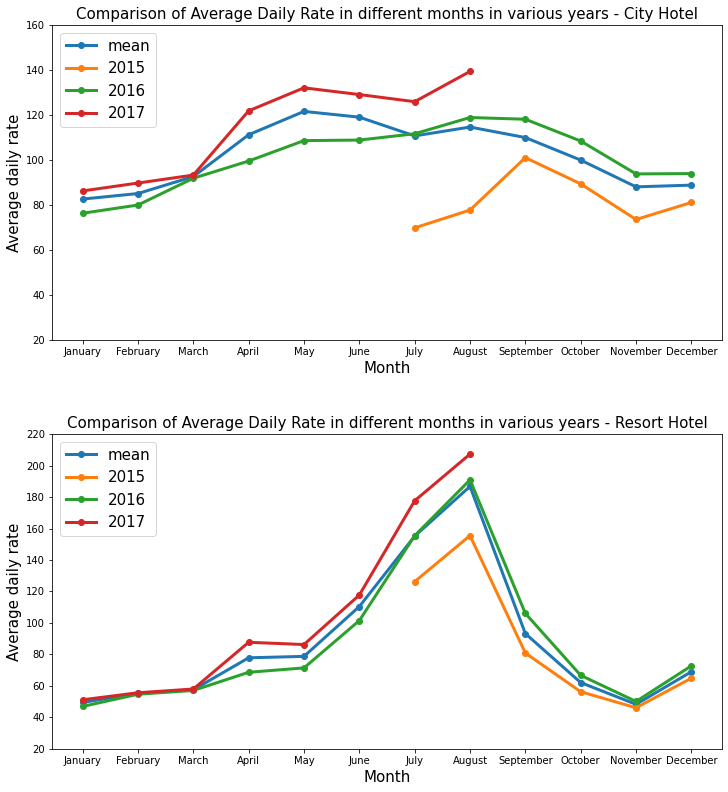

In [ ]:
x = np.nan
city1_monthlist = city1_adr_2_df['arrival_date_month'].tolist()
city1_adr_mean_data = city1_adr_2_df['adr'].tolist()
city1_adr_2015_data = [x,x,x,x,x,x] + city1_adr_2015_1['adr'].tolist() 
city1_adr_2016_data = city1_adr_2016_1['adr'].tolist()
city1_adr_2017_data = city1_adr_2017_1['adr'].tolist() + [x,x,x,x]

resort1_monthlist = resort1_adr_2_df['arrival_date_month'].tolist()
resort1_adr_mean_data = resort1_adr_2_df['adr'].tolist()
resort1_adr_2015_data = [x,x,x,x,x,x] + resort1_adr_2015_1['adr'].tolist() 
resort1_adr_2016_data = resort1_adr_2016_1['adr'].tolist()
resort1_adr_2017_data = resort1_adr_2017_1['adr'].tolist() + [x,x,x,x]

plt.subplot(2,1,1)
plt.plot(city1_monthlist, city1_adr_mean_data, label = 'mean', marker='o', linewidth=3)
plt.plot(city1_monthlist, city1_adr_2015_data, label = '2015', marker='o', linewidth=3)
plt.plot(city1_monthlist, city1_adr_2016_data, label = '2016', marker ='o', linewidth=3)
plt.plot(city1_monthlist, city1_adr_2017_data, label = '2017', marker ='o', linewidth=3)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Average daily rate', fontsize = 15)
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(city1_monthlist)
plt.yticks([20,40,60,80,100,120,140,160])
plt.title('Comparison of Average Daily Rate in different months in various years - City Hotel', fontsize=15)
plt.rcParams['figure.figsize'] = (14,7)

plt.subplot(2,1, 2)
plt.plot(resort1_monthlist, resort1_adr_mean_data, label = 'mean', marker='o', linewidth=3)
plt.plot(resort1_monthlist, resort1_adr_2015_data, label = '2015', marker='o', linewidth=3)
plt.plot(resort1_monthlist, resort1_adr_2016_data, label = '2016', marker ='o', linewidth=3)
plt.plot(resort1_monthlist, resort1_adr_2017_data, label = '2017', marker ='o', linewidth=3)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Average daily rate', fontsize = 15)
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(resort1_monthlist)
plt.yticks([20,40,60,80,100,120,140,160,180,200,220])
plt.title('Comparison of Average Daily Rate in different months in various years - Resort Hotel', fontsize=15)
plt.rcParams['figure.figsize'] = (12,6)

plt.subplots_adjust(left=None, bottom=None, right=None, top=1.8, wspace=None, hspace=0.3)
plt.show()




In [ ]:
citad = city1_adr_2_df['adr'].sum()
resad = resort1_adr_2_df['adr'].sum()
dictad = [citad,resad]
addf= pd.DataFrame(dictad, index=['City hotel','Resort hotel'], columns=['total adr'])
addf

,total adr
City hotel,1224.614933
Resort hotel,1043.786082


Text(0.5, 1.0, 'Total mean adr in a year')

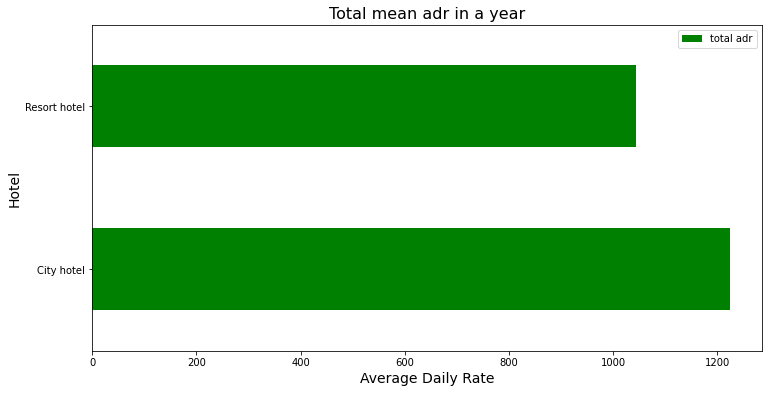

In [ ]:
ax = addf.plot.barh(color='green')
ax.set_xlabel('Average Daily Rate', fontsize=14)
ax.set_ylabel('Hotel', fontsize=14)
ax.set_title('Total mean adr in a year',fontsize=16)

In [ ]:
# new line
# Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
# This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
# Explore and analyze the data to discover important factors that govern the bookings.

In [ ]:
# EDA ON HOTEL BOOKING ANALYSIS